In [1]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Installing imblearn which could be used for balancing the imbalanced classes
!pip install imblearn

In [3]:
# Reading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is the dataset, we have 908 rows(0-907). 

We have 25 columns(0-24). 

Here we need make predictions on two columns :
    1) Primary Fuel
    2) capacity_mw

We can also infer that for the target column "primary_fuel", it contains categorical data (has 8 classes), hence is a Classification Problem , we need to use Classification models to perform our predictions on primary_fuel.

And the next predictions on "capacity_mw" and it contains continuous data and hence is a Regression problem and we need to use Regression models to perform our predictions in here.

# Exploratory Data Analysis (EDA)

In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


df.head() displays the first 5 row values(indexed from 0-4) from the dataset

In [6]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df.tail() displays the last 5 row values(indexed from 903-907) from the dataset

In [7]:
df.shape

(908, 25)

No. of rows - 908
    
No. of columns - 25

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh(number): estimated electricity generation in gigawatt-hours


 df.columns gives the names of all 25 column headings and above is the description of each column

In [9]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

 This df.dtypes displays the datatypes of all the 25 columns in the dataset
    
 The info that can be infered here is as below

 The column "country_long", "country", "name", "primary_fuel", "other_fuel1", "other_fuel2",  "owner","source","url","geolocation_source" and "generation_data_source" are all of string datatype and hence not identified and  dtype for these is shown as object

 All the rest columns have float values in them and is identified to be of float datatype.
    
 The column "gppd_idnr" is alphanumeric and is not identified. The datatype for this is seen as object

 We need to treat them and make them identifiable for our models to understand 
    

# Data Manipulation

In [10]:
# Check on categorical variables:

df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
       'other_fuel1', 'other_fuel2', 'owner', 'source', 'url',
       'geolocation_source', 'generation_data_source'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

The info that we can infer from df.info() is as below

Total entries are 908(0-907)

Total data columns is 25

Few data column contains no null values, hence the non-null count is 908 for all those columns

There are many null values present in our feature columns

Three columns "other_fuel3", "wepp_id" and "estimated_generation_gwh" contains all null values in them, we can just drop them

The columns with string and alphanumeric values in them are not identified and datatype is displayed as object

Other columns are of float datatype since it contains float values present in them

This also gives info on the memory usage



In [12]:
df.drop(["other_fuel3",'wepp_id','estimated_generation_gwh'],axis=1,inplace = True)

In [13]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have successfully dropped the 3 columns which contained only null values in them , hence the column count is updated to 22

In [14]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

From here we can infer that we have missing values present in few columns. 

The columns that have missing values present in them are "latitude","longitude", "other_fuel1", "other_fuel2", "commissioning_year ", "owner", "geolocation_source", "year_of_capacity_data", "generation_gwh_2013","generation_gwh_2014","generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017" . 

The solution is that we need to fill some values in them. Let's find out the location.

In [15]:
np.where(pd.isnull(df)) #This is to find the location if incase null values are present in the dataset

(array([  0,   0,   0, ..., 907, 907, 907], dtype=int64),
 array([ 8,  9, 15, ..., 19, 20, 21], dtype=int64))

In [16]:
df.iloc[0,8]

nan

In [17]:
[df.iloc[i,j] for i,j in zip(*np.where(pd.isnull(df)))]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

All the values of rows and columns passed in the for loop has NaN

In [18]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

No empty strings present in any location of our dataset

# Missing value treatment

For the categorical data, the best solution is to fill missing values with mode

For continuous and normally distributed data, the best solution is to fill the missing values with mean

For continuous but not normally distributed data, the best solution is to fill the missing values with median

In [19]:
df.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
other_fuel2                 1
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

In [20]:
df['country'].unique()
df['country'].value_counts()

IND    908
Name: country, dtype: int64

We have 908 count of same value IND in column country, not useful in predictions

Hence can be dropped

In [21]:
df['country_long'].unique()
df['country_long'].value_counts()


India    908
Name: country_long, dtype: int64

We have 908 count of same value India in column country, not useful in predictions

Hence can be dropped

In [22]:
df['other_fuel2'].unique()
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

We have 1 count of value as oil in the column "other_fuel2", rest all is null values

Not useful for our predictions and hence could be dropped

In [23]:
df['year_of_capacity_data'].unique()
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

We have 520 count of 2018 as value in "year_of_capacity_data", rest 388 are null values

Not useful for our predictions and hence could be dropped

In [24]:
df['generation_data_source'].unique()
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

We have 450 count of Central Electricity Authority as value in "generation_data_source", rest 458 are null values

Not useful for our predictions and hence could be dropped

In [25]:
# Let's drop the above 5 columns

df.drop(["country", "country_long", "other_fuel2", "year_of_capacity_data", "generation_data_source"],axis=1,inplace = True)

In [26]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


We have successfully dropped 5 columns listed above and hence the column count is now updated to 17

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   capacity_mw          908 non-null    float64
 3   latitude             862 non-null    float64
 4   longitude            862 non-null    float64
 5   primary_fuel         908 non-null    object 
 6   other_fuel1          199 non-null    object 
 7   commissioning_year   528 non-null    float64
 8   owner                342 non-null    object 
 9   source               908 non-null    object 
 10  url                  908 non-null    object 
 11  geolocation_source   889 non-null    object 
 12  generation_gwh_2013  384 non-null    float64
 13  generation_gwh_2014  401 non-null    float64
 14  generation_gwh_2015  425 non-null    float64
 15  generation_gwh_2016  437 non-null    flo

# Data Visualization for columns with missing values to check for its distribution

<AxesSubplot:xlabel='latitude', ylabel='Density'>

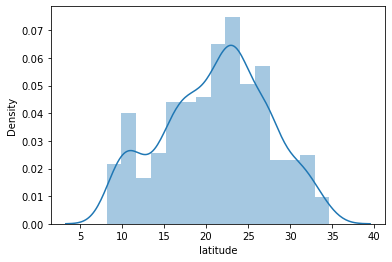

In [28]:
sns.distplot(df["latitude"])

The column "latitude" is almost normally distributed hence can fill the missing values with mean of the values

<AxesSubplot:xlabel='longitude', ylabel='Density'>

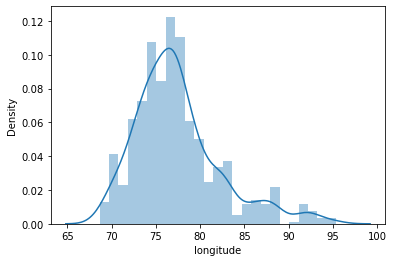

In [29]:
sns.distplot(df["longitude"])

The column "longitude" is almost normally distributed hence can fill the missing values with mean of the values

In [30]:
df["other_fuel1"].unique()
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

This "other_fuel1" is a categorical column having 3 categories and hence the missing values can be filled by mode of the column

In [31]:
df["commissioning_year"].unique()
df['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

This "commissioning_year" is a categorical column having multiple categories and hence the missing values can be filled by mode of the column

In [32]:
df["owner"].unique()
df['owner'].value_counts()

Sterling Agro Industries ltd.         4
Jk Cement ltd                         4
Acc Acc ltd                           4
Government of India                   3
Shree Naman Developers Ltd.           3
                                     ..
Lanco Solar Energy Private Limited    1
Alianz Eco Power Private Limited      1
Ideal Projects ltd                    1
Firestone Trading Private Limited     1
Purti Sugar ltd                       1
Name: owner, Length: 280, dtype: int64

This "owner" is a categorical column having multiple categories and hence the missing values can be filled by mode of the column

In [33]:
df["geolocation_source"].unique()
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

This "geolocation_source" is a categorical column having 3 categories and hence the missing values can be filled by mode of the column 

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

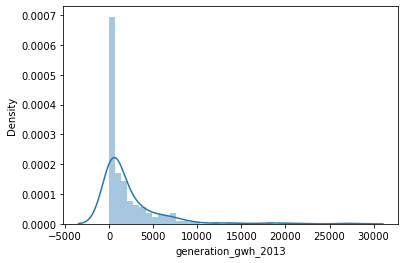

In [34]:
sns.distplot(df["generation_gwh_2013"])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

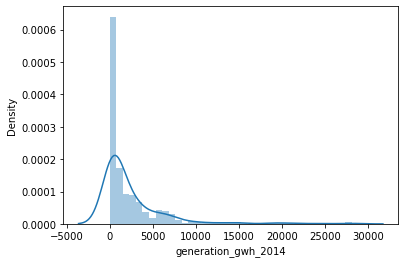

In [35]:
sns.distplot(df["generation_gwh_2014"])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

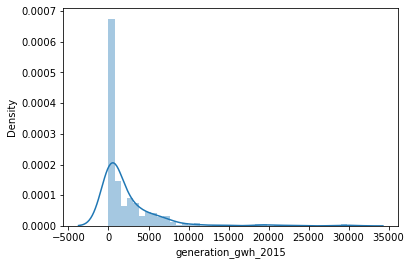

In [36]:
sns.distplot(df["generation_gwh_2015"])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

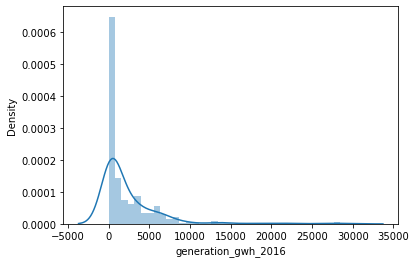

In [37]:
sns.distplot(df["generation_gwh_2016"])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

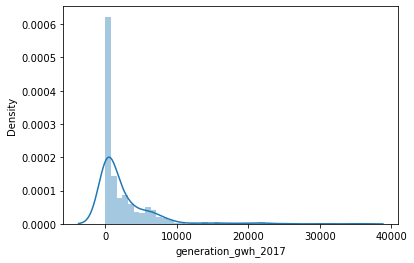

In [38]:
sns.distplot(df["generation_gwh_2017"])

In [39]:
# Filling categorical columns with mode of the data
# Filling continuous data with mean of their values as the data is normally distibuted

#categorical
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)
df['owner'].fillna(df['owner'].mode()[0], inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)
#numerical
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)

In [40]:
df.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

Here we can see that all the missing values are filled and null values in all the columns is equal to zero.

In [41]:
# Trying to find the duplicate rows in our dataset
duplicate=df.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the dataset
df[duplicate]               # prints the duplicate rows in the dataset

0


,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017


There are no duplicates present in our dataset and hence no need of any duplicate treatment here

In [42]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,2003.624449,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,15.238021,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1997.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,2013.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2013.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


From df.describe() we can see the details about various statistical data like Count,Mean,Standard Deviation,Max Value,Min Value for our dataset

So from min and max values, we basically get the range

There seems to be some outliers anyways will verify that when we check for outliers presence. 

The min values for the columns "capacity_mw", "generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017" is 0.00

# Data Visualization

# Uni-Variant Analysis

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

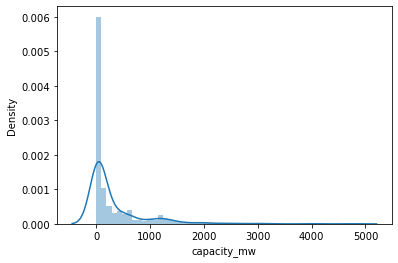

In [43]:
sns.distplot(df["capacity_mw"])

This graph shows the distribution of capacity in milliwatts and is almost normally distributed

<AxesSubplot:xlabel='latitude', ylabel='Density'>

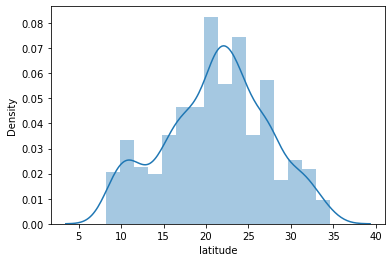

In [44]:
sns.distplot(df["latitude"])

This graph shows the distribution of latitude over a range 

The latitude ranges from 8.16 degrees being minimum to over 34.649 degrees being maximum

<AxesSubplot:xlabel='longitude', ylabel='Density'>

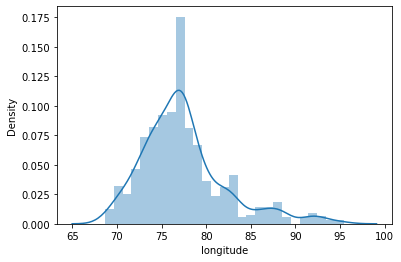

In [45]:
sns.distplot(df["longitude"])

This graph shows the distribution of longitude over a range

The longitude ranges from 95.4 degrees being minimum to over 68.64 degrees being maximum

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

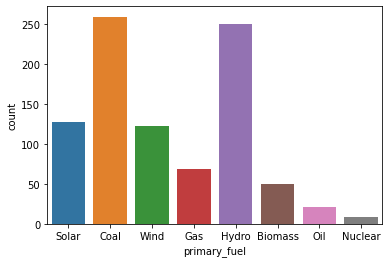

In [46]:
sns.countplot(df['primary_fuel'])
df["primary_fuel"].unique()
df['primary_fuel'].value_counts()


There are 8 types of primary fuels

They are : Solar, Coal, Wind, Gas, Hydro, Biomass, Oil, Nuclear
    
259 no. of power plants are using coal as the primary fuel, 250 uses hydro as the primary fuel,123 uses wind as its primary fuel, 127 plants uses Solar, 69 uses gas, 50 using biomass, 21 plants using oil and other 9 using nuclear as primary fuel

Coal and Hydro is being used in maximum no. of power plants 

Hydro being a renewal source of energy and Coal being abundantly available and is cheap to produce power using this fuel

Solar and Wind is used by almost same no. of plants 

The least type of primary fuels used are Gas, Biomass, Oil and nuclear being the least. These source are difficult to extract and are expensive
    


Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

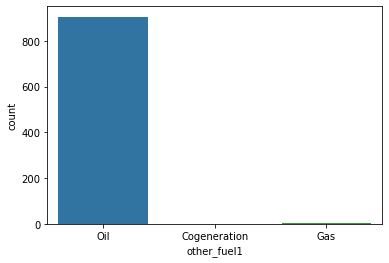

In [47]:
sns.countplot(df['other_fuel1'])
df["other_fuel1"].unique()
df['other_fuel1'].value_counts()

Oil is the other_fuel1 used for power plant in a greater amount i.e., in 905 power plants, other 2 power plants uses gas as their other_fuel1 and only 1 power plant uses Cogeneration as the other fuel 

2013.0    408
2015.0     26
2012.0     23
2016.0     21
2014.0     17
         ... 
1939.0      1
1927.0      1
1949.0      1
1956.0      1
1969.0      1
Name: commissioning_year, Length: 73, dtype: int64

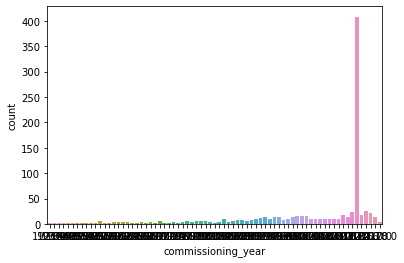

In [48]:
sns.countplot(df['commissioning_year'])
df["commissioning_year"].unique()
df['commissioning_year'].value_counts()

408 plants were operated in the year 2013, 26 plants were operated in 2015 , 21 in 2016, 17 in 2014 . Less no. of plants were operated in 19th century

In [49]:

df["owner"].unique()
df['owner'].value_counts()


Acc Acc ltd                           570
Sterling Agro Industries ltd.           4
Jk Cement ltd                           4
Government of India                     3
Shree Naman Developers Ltd.             3
                                     ... 
Lanco Solar Energy Private Limited      1
Alianz Eco Power Private Limited        1
Ideal Projects ltd                      1
Firestone Trading Private Limited       1
Purti Sugar ltd                         1
Name: owner, Length: 280, dtype: int64

The owner of huge no. of power plant (570) is Acc Acc ltd

The Acc Acc ltd are the shareholders of maximum power plants

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
AES Winfra                                     1
Nitin Spinners ltd                             1
Sinewave Pvt ltd                               1
Datta Ssk ltd                                  1
LEPL                                           1
Name: source, Length: 191, dtype: int64

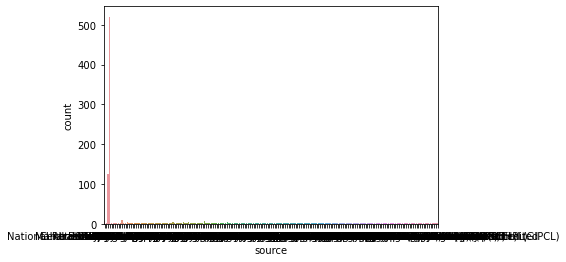

In [50]:
sns.countplot(df['source'])
df["source"].unique()
df['source'].value_counts()


The source of huge no. of power plants is Central Electricity Authority

These are the entites reporting the data

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

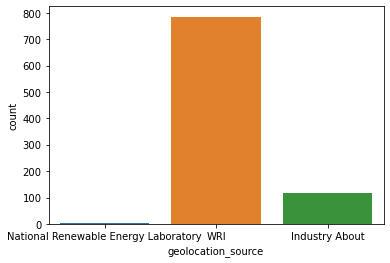

In [51]:
sns.countplot(df['geolocation_source'])
df["geolocation_source"].unique()
df['geolocation_source'].value_counts()


785 number of power plants have their geolocation source as WRI

119 have Industry as the geolocation source 

4 power plants have National Renewable Energy Laboratory as their Geolocation source

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

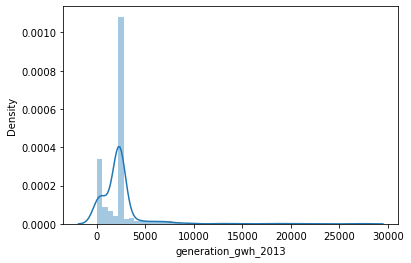

In [52]:
sns.distplot(df["generation_gwh_2013"])

The graph shows the plot of electricity generation in gigawatt-hours reported for the year 2013

The graph is almost normally distributed and ranges from 0.00 gwh to 27586.2 gwh

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

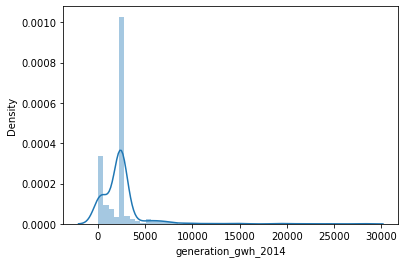

In [53]:
sns.distplot(df["generation_gwh_2014"])

The graph shows the plot of electricity generation in gigawatt-hours reported for the year 2014

The graph is almost normally distributed and ranges from 0.00 gwh to 28127.0 gwh

We can see that the maximum value of electricity generation is higher than the year 2013

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

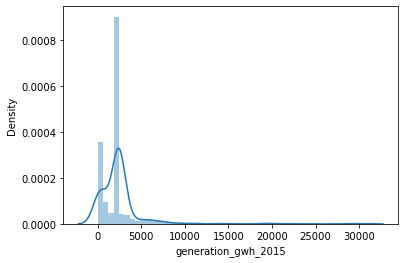

In [54]:
sns.distplot(df["generation_gwh_2015"])

The graph shows the plot of electricity generation in gigawatt-hours reported for the year 2015

The graph is almost normally distributed and ranges from 0.00 gwh to 30539.0 gwh

We can see that the maximum value of electricity generation is higher than the year 2013 and 2014

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

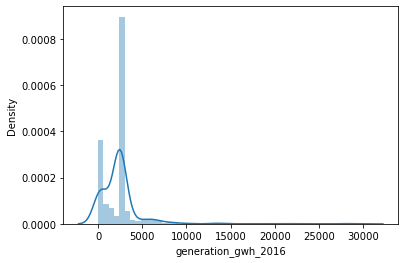

In [55]:
sns.distplot(df["generation_gwh_2016"])

The graph shows the plot of electricity generation in gigawatt-hours reported for the year 2016

The graph is almost normally distributed and ranges from 0.00 gwh to 30015.0 gwh

We can see that the maximum value of electricity generation is higher than the year 2013 and 2014 but slightly less than that of the year 2015

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

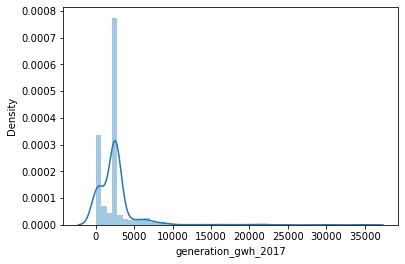

In [56]:
sns.distplot(df["generation_gwh_2017"])

The graph shows the plot of electricity generation in gigawatt-hours reported for the year 2017

The graph is almost normally distributed and ranges from 0.00 gwh to 35116.0 gwh

We can see that the maximum value of electricity generation is higher than the year 2013, 2014 , year 2015 and 2016

Maximum value of electricity generation is in the year 2017

# Bi- Variant Analysis

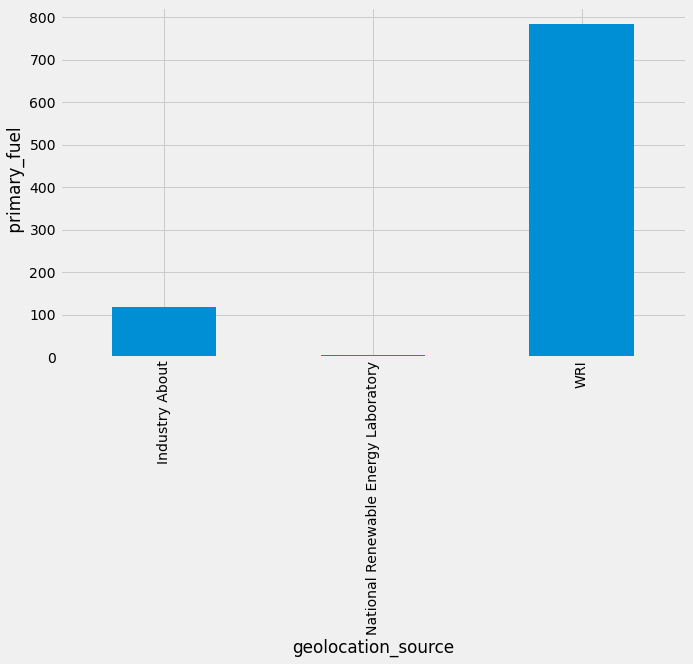

In [57]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('geolocation_source').primary_fuel.count().plot.bar(ylim=0)
ax.set_ylabel(' primary_fuel')
plt.show()

The count of primary_fuel is higher for WRI geolocation_source 

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2013'>

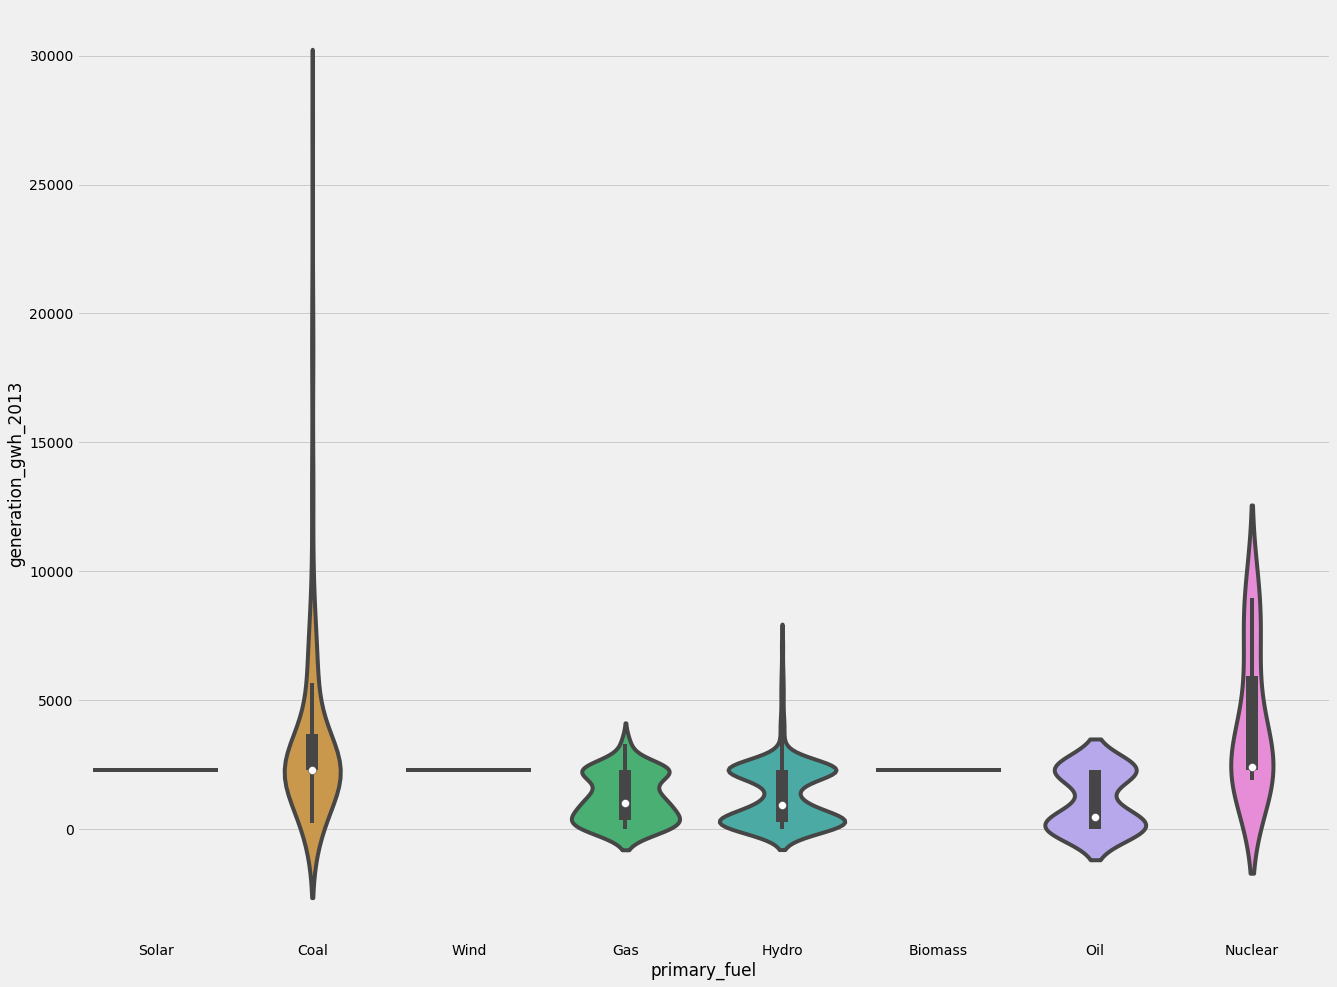

In [58]:
plt.figure(figsize=(20,16))
sns.violinplot(x='primary_fuel',y='generation_gwh_2013',data=df)

The Coal is used as the primary fuel when the electricity generation is between 0 to 5000 gwh range

power plants in higher range of electricity generation above 5000 also are using Coal as the primary fuel

Hydro is highly used for the power plants generating the electricity in the range of 0 - 2500 gwh

Oil is used as primary fuel for the power plants within the electricity generation range of 0-3000 gwh

Nuclear as a primary fuel is distributed for the range of 0 - 5000 gwh also its is used for generation range above 5000 aswell for a few range

<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

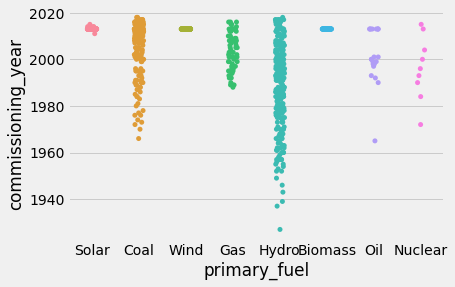

In [59]:
sns.stripplot(x='primary_fuel',y='commissioning_year',data=df)

As we can see Hydro is greatly used as the primary fuel for the plants that were operated very early starting from 1930s

Coal is also abundantly used for the power plants operating from 1970s

Solar as a primary fuel for the power plant is used lately in 20s

Biomass, oil and nuclear are also used very less but we can find its usage for the power plants operating nearing to the year 2000

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

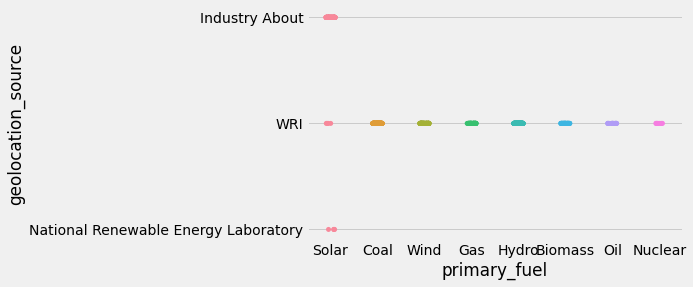

In [60]:
sns.stripplot(x='primary_fuel',y='geolocation_source',data=df)

The power plants in geolocation source WRI uses all the primary fuels types i.e., Solar, coal, wind, gas, hydro, biomass , oil and nuclear

The power plants operating in the geolocation National Renewable Energy laboratory uses Solar energy as the primary fuel

Even the geolocation type Industry about power plants uses Solar as primary fuels

We can drop the columns gppd_idnr because its just an ID and also url just contains the web document corresponding to the source field and they are not very much helpful for our predictions



In [61]:
df.drop(['gppd_idnr','url'],axis=1,inplace = True)

In [62]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2013.0,AES,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Acc Acc ltd,Central Electricity Authority,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,2013.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,2013.0,Acc Acc ltd,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,2013.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


We have successfully dropped the url and the ID column hence the column count is updated to 15

# Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
category= ['name','primary_fuel','other_fuel1','owner','source','geolocation_source'] 
encoder= LabelEncoder()
for i in category:   
    df[i] = encoder.fit_transform(df[i]) 
df.dtypes

name                     int32
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
commissioning_year     float64
owner                    int32
source                   int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

The categorical columns are encoded and the datatype is changed from object to model identifiable type

So now after encoding all the variables belongs to either integer or float datatype

In [64]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,98.0,24.7663,74.6090,1,2,2013.0,258,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,39.2,21.9038,69.3732,7,2,2013.0,2,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,3,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,1600.0,16.2949,77.3568,1,2,2016.0,5,22,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,904,3.0,12.8932,78.1654,6,2,2013.0,114,77,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,905,25.5,15.2758,75.5811,7,2,2013.0,5,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,906,80.0,24.3500,73.7477,1,2,2013.0,91,59,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


We can observe the encoded dataframe

From above we can also remove the column name because all the power plants have unique names and that is not helping in our predicting the primary_fuel or the capacity. Its just an identification for the power plant

In [65]:
df.drop(['name'],axis=1,inplace = True) 

In [66]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,2011.0,229,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,2,2013.0,258,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,2,2013.0,2,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,2,2004.0,5,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2016.0,5,22,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2,2013.0,114,77,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,2,2013.0,5,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,2,2013.0,91,59,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


We have successfully dropped the column name and now the count of columns is updated to 14

# Multi-Variant Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'capacity_mw'),
  Text(0, 1.5, 'latitude'),
  Text(0, 2.5, 'longitude'),
  Text(0, 3.5, 'primary_fuel'),
  Text(0, 4.5, 'other_fuel1'),
  Text(0, 5.5, 'commissioning_year'),
  Text(0, 6.5, 'owner'),
  Text(0, 7.5, 'source'),
  Text(0, 8.5, 'geolocation_source'),
  Text(0, 9.5, 'generation_gwh_2013'),
  Text(0, 10.5, 'generation_gwh_2014'),
  Text(0, 11.5, 'generation_gwh_2015'),
  Text(0, 12.5, 'generation_gwh_2016'),
  Text(0, 13.5, 'generation_gwh_2017')])

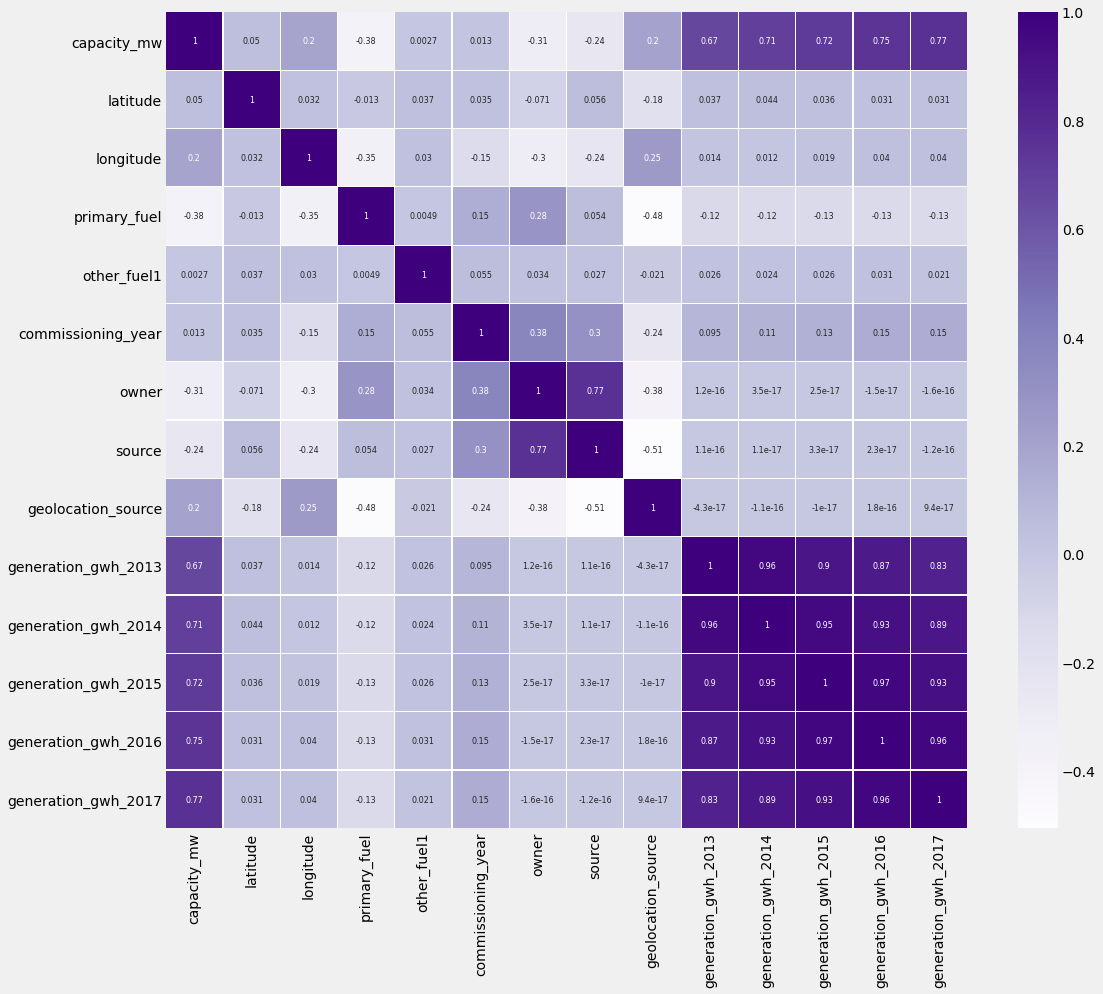

In [67]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),linewidths=.2,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)

From this heatmap we have got the correlation values 

we can see that the columns "generation_gwh_2013", "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017" have high positive correlation with our target column capacity_mw

Its very much makes sense that the capacity of the power plant and electricity generation from the power plant are highly correlated

So if the capacity of the power plant is high then the electricity generated in gwh also will be higher

Among the generation features , the column generation_gwh_2017 is higly correlated (.77) with the target capacity_mw

The other_fuel1 is least correlated with our target column capacity

Our next target column is primary fuel, so let's analyse the correaltion values to this target column

The highly correlated feature for predicting the primary_fuel is the geo-location source 

The column capacity_mw is also positively correlated with the target primary fuel

In makes sense that capacity of the power plant depends on primary fuel

The type of primary fuel depends on the geo-location source

In [68]:
cor = df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.049790,0.197124,-0.377783,0.002672,0.012518,-3.105601e-01,-2.417009e-01,2.046977e-01,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01
latitude,0.049790,1.000000,0.031501,-0.013453,0.036606,0.034896,-7.085504e-02,5.594280e-02,-1.839986e-01,3.663949e-02,4.408464e-02,3.612730e-02,3.093239e-02,3.065498e-02
longitude,0.197124,0.031501,1.000000,-0.348710,0.030297,-0.145117,-3.008993e-01,-2.390075e-01,2.524152e-01,1.402097e-02,1.166872e-02,1.917647e-02,3.975774e-02,4.040690e-02
primary_fuel,-0.377783,-0.013453,-0.348710,1.000000,0.004902,0.145487,2.840550e-01,5.360860e-02,-4.828029e-01,-1.205116e-01,-1.249997e-01,-1.251376e-01,-1.313584e-01,-1.321741e-01
other_fuel1,0.002672,0.036606,0.030297,0.004902,1.000000,0.054789,3.364301e-02,2.655707e-02,-2.138286e-02,2.590227e-02,2.425847e-02,2.649904e-02,3.128383e-02,2.087114e-02
commissioning_year,0.012518,0.034896,-0.145117,0.145487,0.054789,1.000000,3.816148e-01,3.016596e-01,-2.424386e-01,9.453018e-02,1.145342e-01,1.273249e-01,1.472747e-01,1.478741e-01
owner,-0.310560,-0.070855,-0.300899,0.284055,0.033643,0.381615,1.000000e+00,7.696524e-01,-3.849925e-01,1.159716e-16,3.452904e-17,2.535297e-17,-1.496135e-17,-1.563929e-16
source,-0.241701,0.055943,-0.239008,0.053609,0.026557,0.301660,7.696524e-01,1.000000e+00,-5.058227e-01,1.148485e-16,1.129442e-17,3.266585e-17,2.296820e-17,-1.191072e-16
geolocation_source,0.204698,-0.183999,0.252415,-0.482803,-0.021383,-0.242439,-3.849925e-01,-5.058227e-01,1.000000e+00,-4.314899e-17,-1.111170e-16,-1.004804e-17,1.807415e-16,9.412254e-17
generation_gwh_2013,0.667842,0.036639,0.014021,-0.120512,0.025902,0.094530,1.159716e-16,1.148485e-16,-4.314899e-17,1.000000e+00,9.634535e-01,8.963761e-01,8.735420e-01,8.306385e-01


This is the correlation values for our dataset which we saw visually using the heatmap

We can see that the generation_gwh has high positive correlation with our target variable i.e., capacity_mw

capacity_mw and geolocation_source has high correlation with the target variable primary_fuel

In [69]:
# Representing which columns have positive and negative correlations with the target column

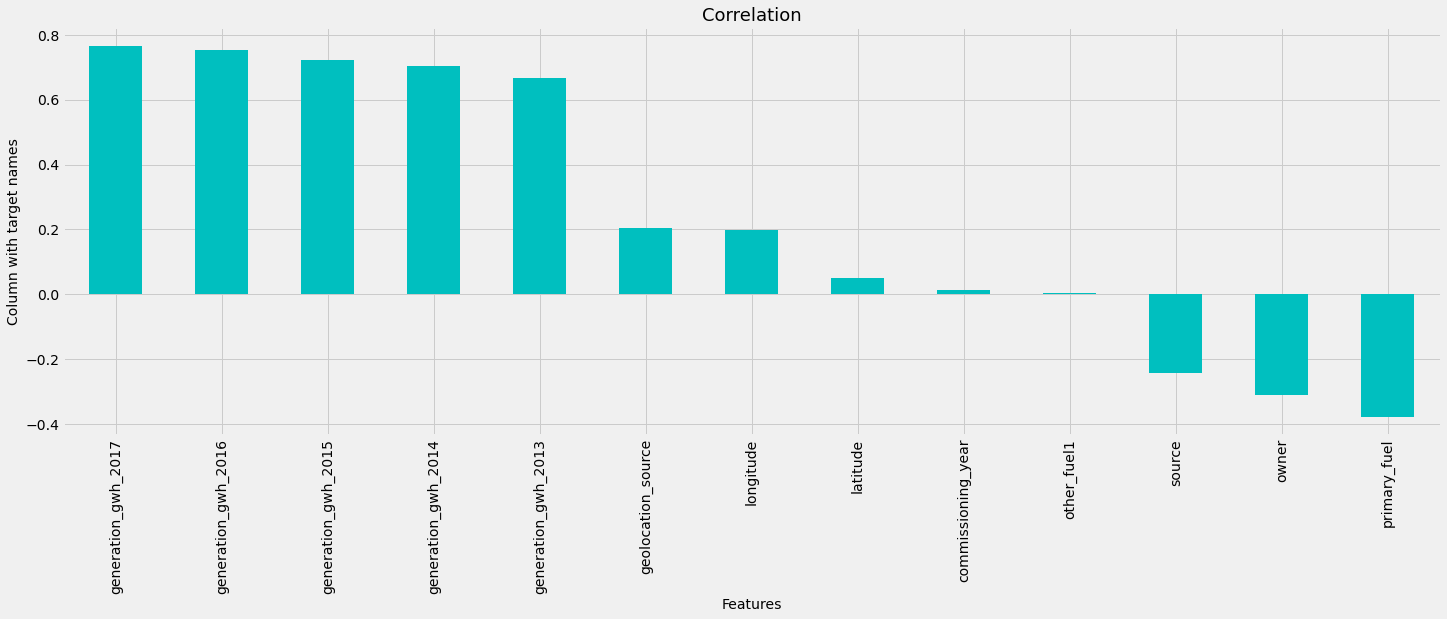

In [70]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(["capacity_mw"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

The above graph shows the columns that are positively and negatively correlated with the target capacity_mw



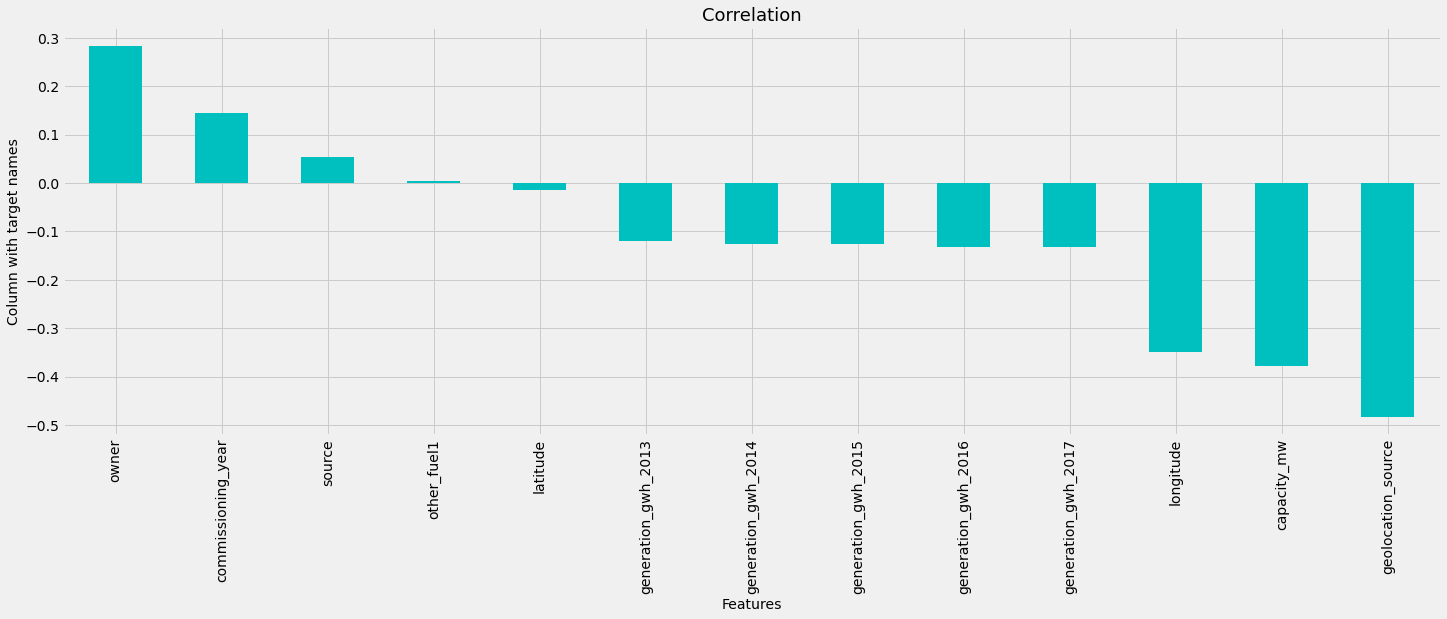

In [71]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(["primary_fuel"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

This graph shows the columns that are positively and negatively correlated with the target column primary fuel

# Checking the presence of outliers

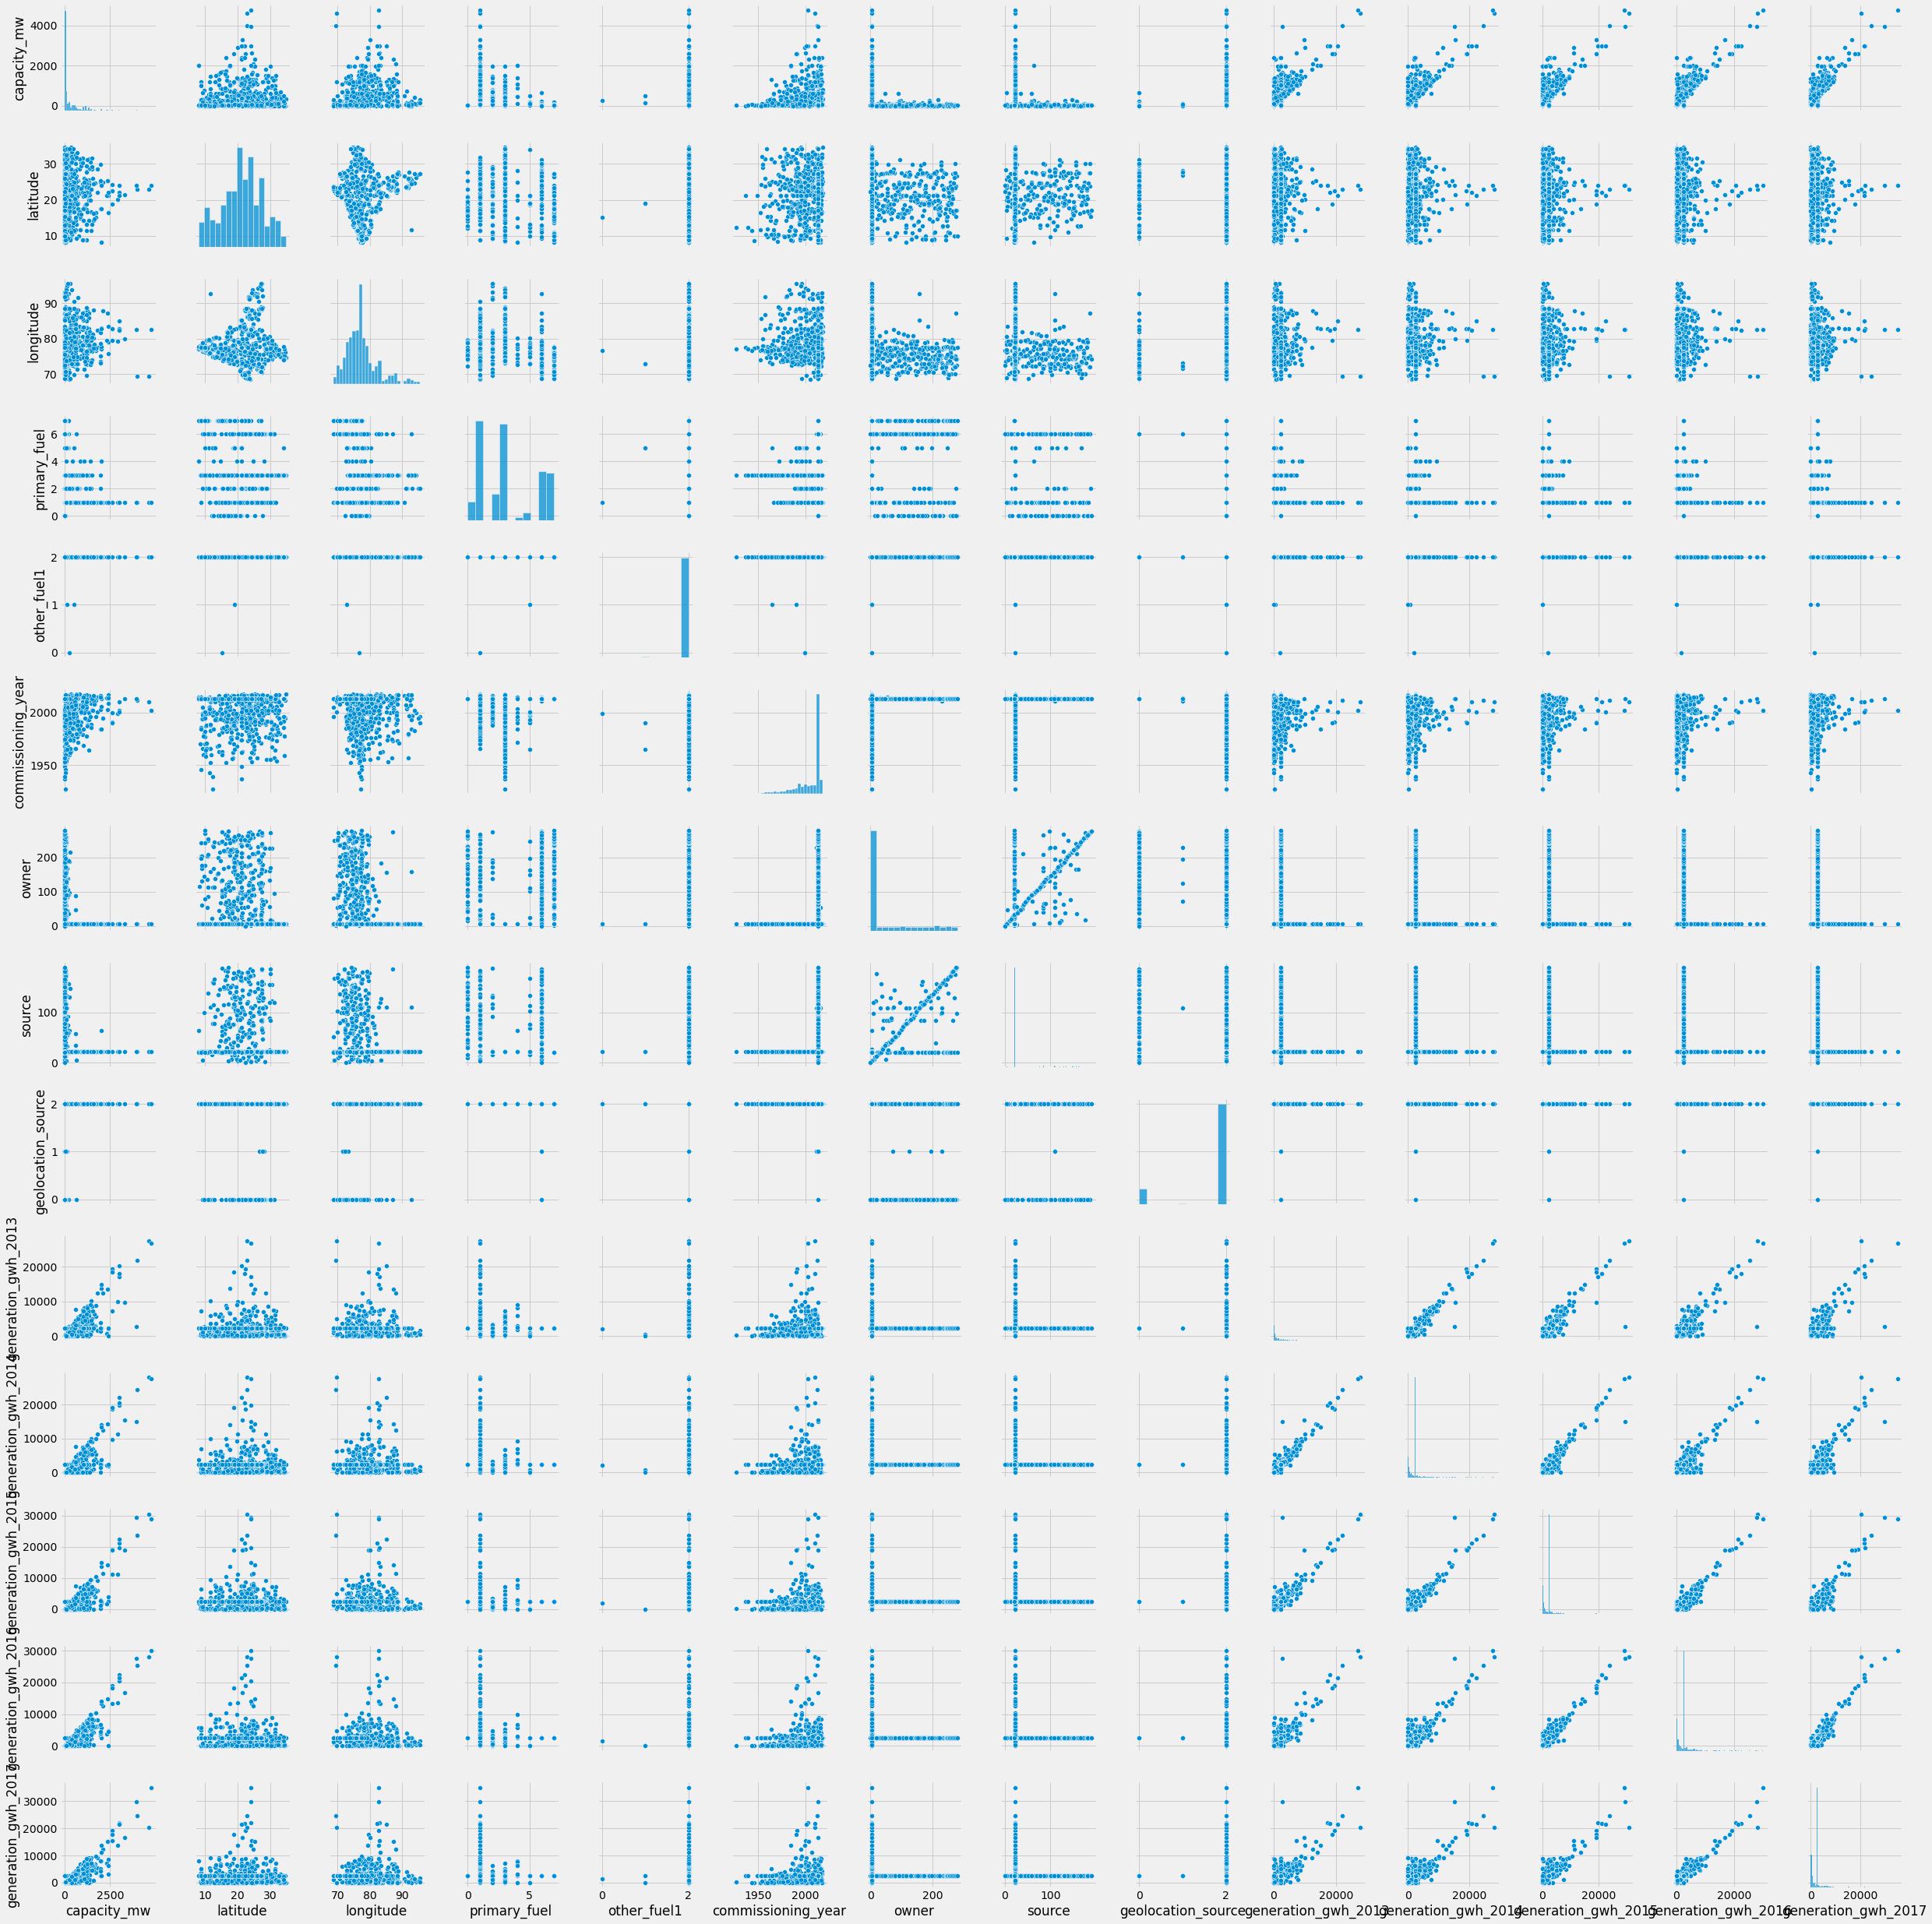

In [72]:
sns.pairplot(df)

We can see that there are outliers in almost all the variables

In [73]:
df.skew()

capacity_mw             3.193257
latitude               -0.147391
longitude               1.129836
primary_fuel            0.471141
other_fuel1           -20.464435
commissioning_year     -1.779021
owner                   1.366078
source                  1.829145
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64

 We can see the presence of skewness in our data
    
 As we saw the presence of outliers and hence the skewness is present

-(0.5) to +(0.5), the skewness within this range is acceptable

We have skewness of many columns way outside the above mentioned range and they need to be treated. 

Skewness is present highly.

# Considering to remove the outliers

In [74]:
# Outlier treatment using IQR

import numpy as np
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

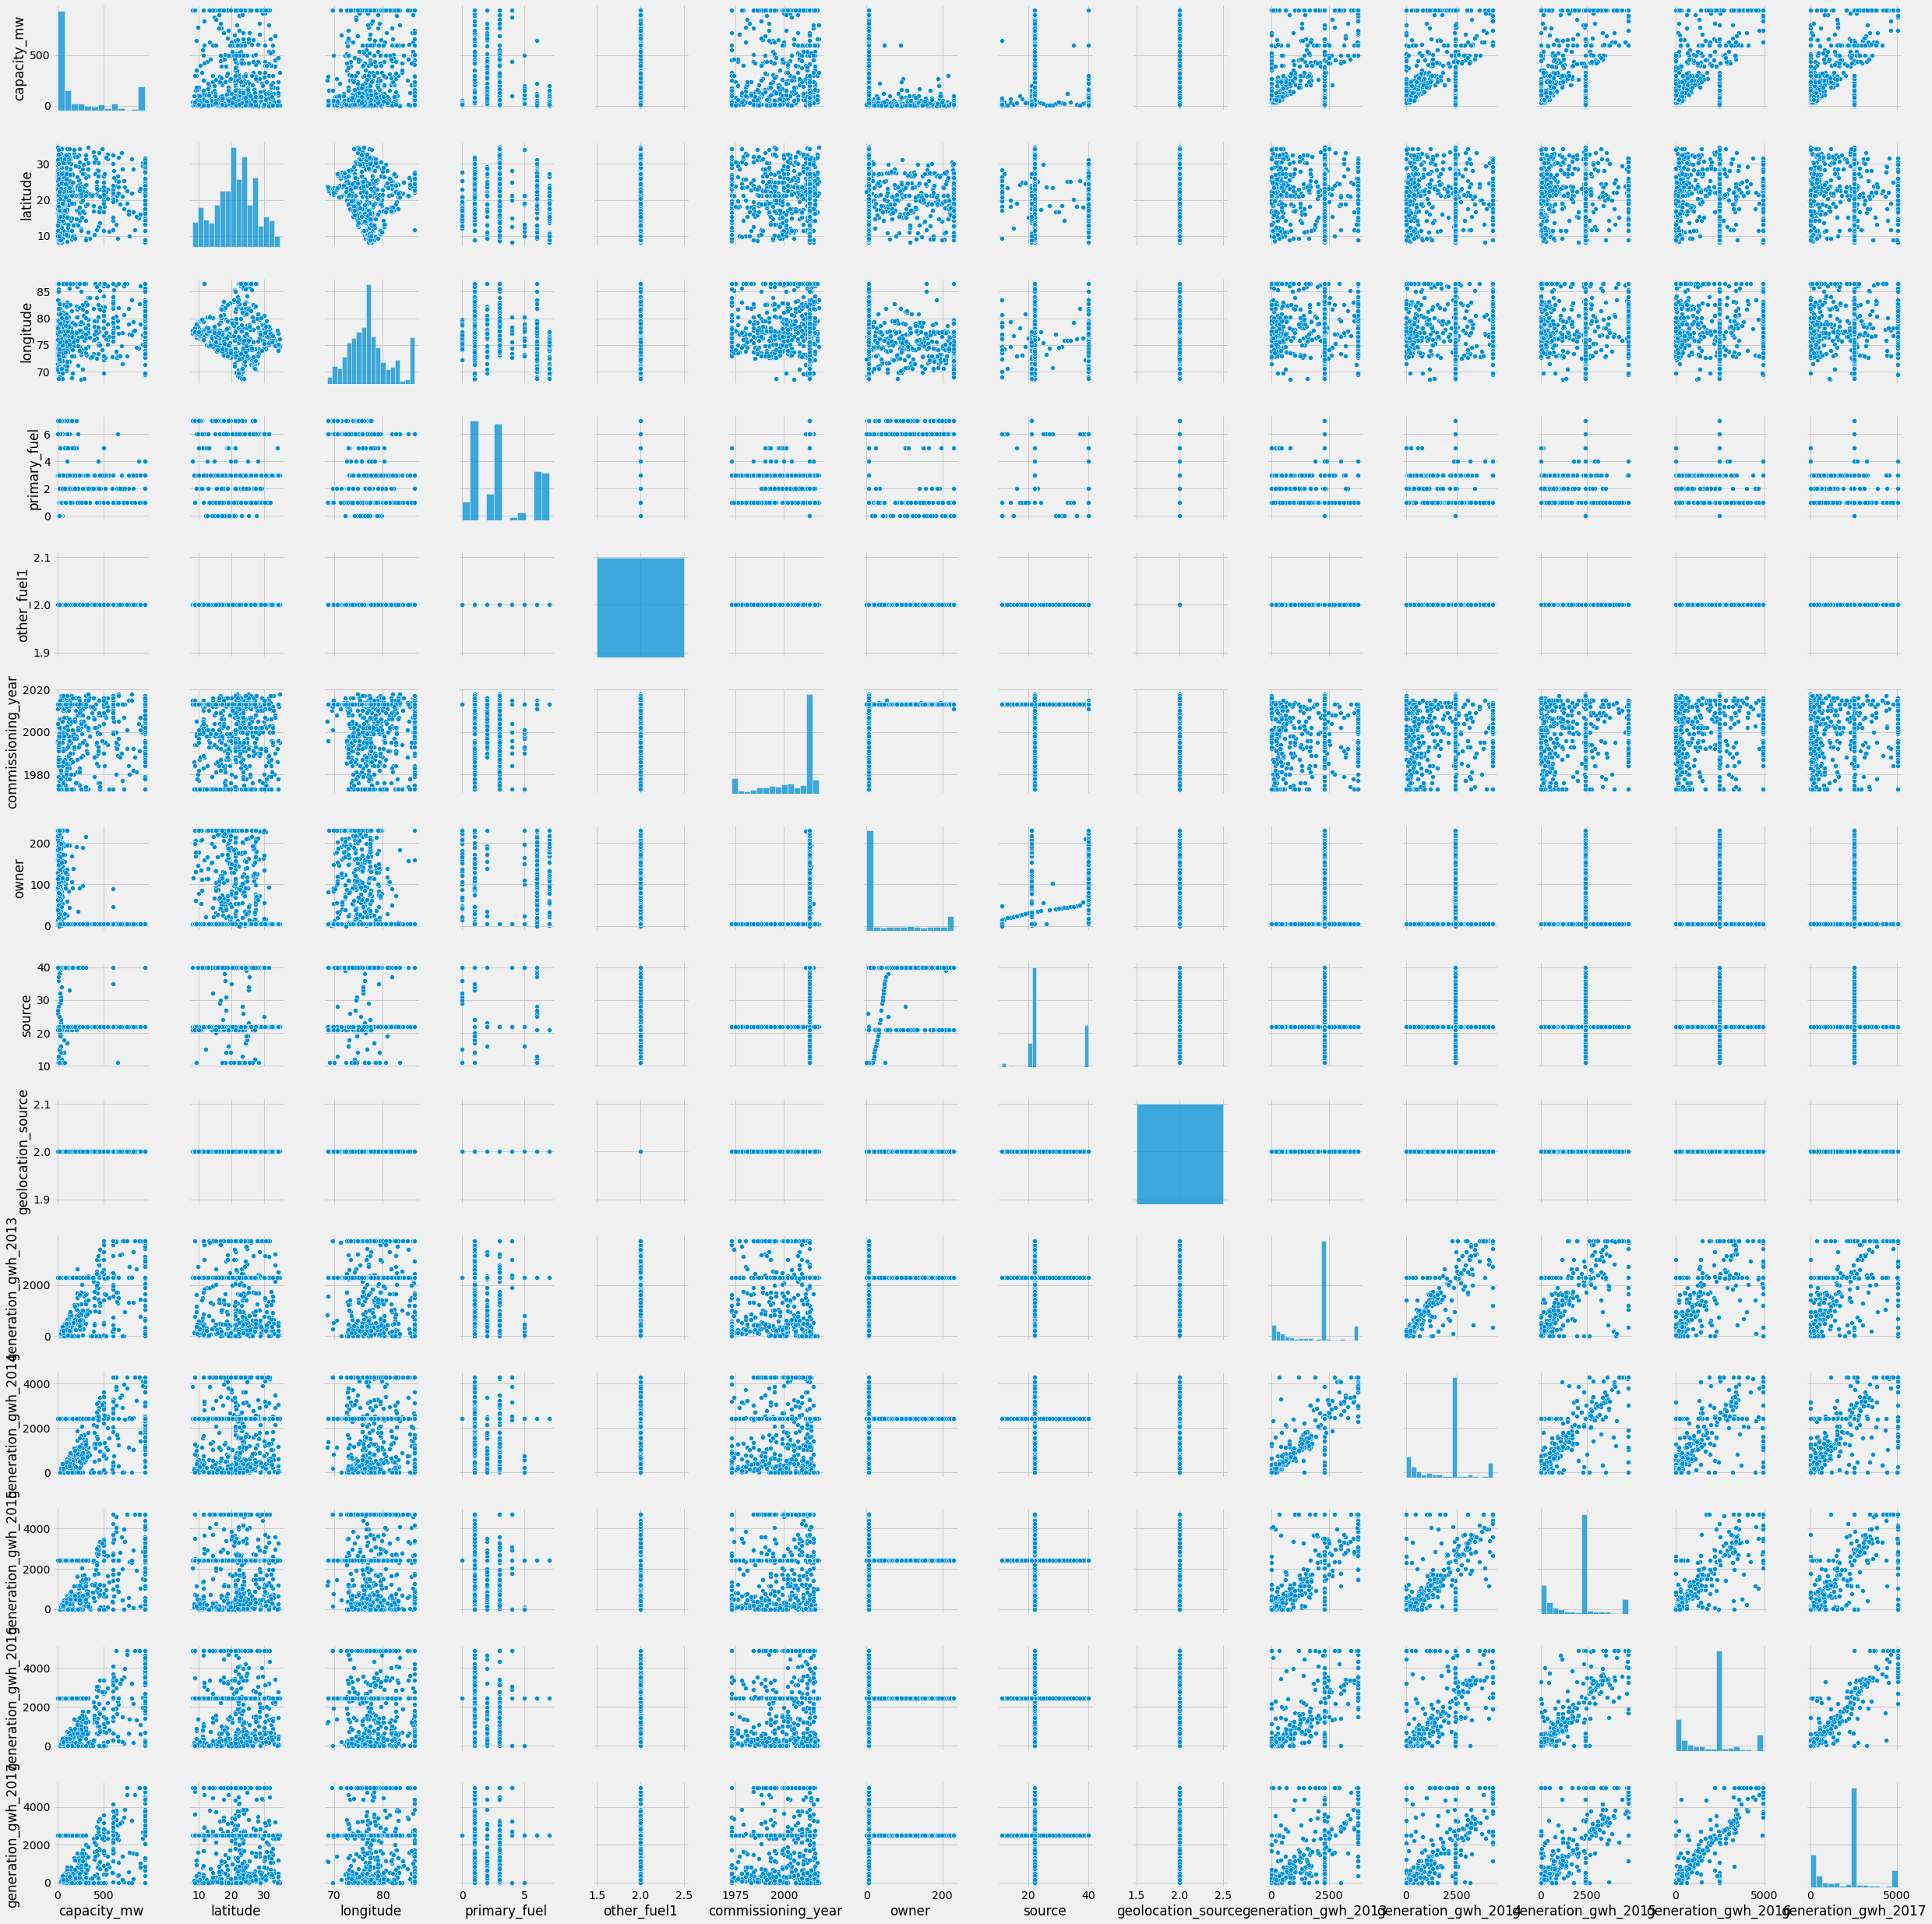

In [75]:
sns.pairplot(df)

In [76]:
# Outliers are greatly removed and hence the skewness would be reduced, lets check

In [77]:
df.skew()

capacity_mw            1.306045
latitude              -0.147391
longitude              0.562293
primary_fuel           0.471141
other_fuel1            0.000000
commissioning_year    -1.260224
owner                  1.276659
source                 0.972001
geolocation_source     0.000000
generation_gwh_2013   -0.459761
generation_gwh_2014   -0.215044
generation_gwh_2015    0.104200
generation_gwh_2016    0.175889
generation_gwh_2017    0.195457
dtype: float64

Skewness is reduced to greater extent

# Splitting dataset to perform predictions on Primary_fuel

In [78]:
# Splitting the dataset into X features and y label

# First let's perform prediction on Primary_fuel later on capacity_mw

# Performing predictions on primary fuel

X = df.drop(["primary_fuel"],axis=1)
y = df["primary_fuel"]

In [79]:
X

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.50000,28.1839,73.240700,2,2011.0,229,40,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.00000,24.7663,74.609000,2,2013.0,230,40,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.20000,21.9038,69.373200,2,2013.0,2,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.00000,23.8712,86.443625,2,2004.0,5,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,945.05625,21.9603,82.409100,2,2015.0,5,22,2,1668.290000,3035.550000,4723.873434,4894.896104,5050.727813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,945.05625,16.2949,77.356800,2,2016.0,5,22,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.00000,12.8932,78.165400,2,2013.0,114,40,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.50000,15.2758,75.581100,2,2013.0,5,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.00000,24.3500,73.747700,2,2013.0,91,40,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [80]:
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

In [81]:
df['primary_fuel'].value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [82]:
# Applying over-sampling to balance our classes

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [83]:
y.value_counts()

7    259
5    259
3    259
1    259
6    259
4    259
2    259
0    259
Name: primary_fuel, dtype: int64

Now that we see that our classes are balanced with count of 259


In [84]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.15388871 0.12720289 0.12521704 0.         0.10622079 0.08094835
 0.12493872 0.         0.04966101 0.05825115 0.0568128  0.06023428
 0.05662425]


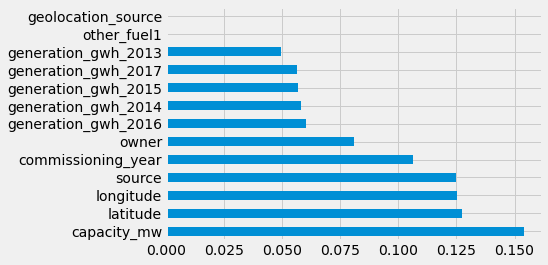

In [85]:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

This proves the very important feature is "capacity_mw" and "geolocation source"

In [86]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Machine Learning Model

# Hyper-parameter tuning

In [87]:
# Scaling the  values in the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_xtrain=scaler.fit_transform(X_train)
scaled_xtest=scaler.transform(X_test)

In [88]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Support Vector Classifier

In [89]:
svc = SVC()
svc.fit(scaled_xtrain, y_train)
y_pred = svc.predict(scaled_xtest)

# accuracy_score, confusion_matrix and classification_report
svc_train_acc = accuracy_score(y_train, svc.predict(scaled_xtrain))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8243243243243243
Test accuracy of Support Vector Classifier is : 0.7895752895752896
[[65  0  0  0  0  0  0  1]
 [ 7 28  9  4  5  1  8  3]
 [ 2  5 49  0  2 15  0  2]
 [ 0  6  3 42  3  7  0  0]
 [ 0  0  0  0 59  0  0  0]
 [ 6  0  0  1  0 52  0  0]
 [17  0  0  0  0  2 44  0]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.67      0.98      0.80        66
           1       0.72      0.43      0.54        65
           2       0.80      0.65      0.72        75
           3       0.89      0.69      0.78        61
           4       0.86      1.00      0.92        59
           5       0.68      0.88      0.76        59
           6       0.85      0.70      0.77        63
           7       0.92      1.00      0.96        70

    accuracy                           0.79       518
   macro avg       0.80      0.79      0.78       518
weighted avg       0.80      0.79      0.78      

I have used classification report because it gives all the values of accuracy,precision, recall and f1-score

Since the classes are balanced we can just take accuracy into consideration

We are getting 79% Accuracy using SupportVectorClassifier

In [90]:
print(cross_val_score(svc,X,y,cv=5).mean())

0.42470170537221347


# KNN

In [91]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(scaled_xtrain, y_train)
y_pred = knn.predict(scaled_xtest)

# accuracy_score, confusion_matrix and classification_report
knn_train_acc = accuracy_score(y_train, knn.predict(scaled_xtrain))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.758043758043758
Test accuracy of KNN is : 0.7297297297297297
[[61  0  0  0  0  4  0  1]
 [ 6 20  9  5 12  3  5  5]
 [ 2  4 41  1  3 21  0  3]
 [ 0  2  7 38  6  8  0  0]
 [ 0  0  0  0 59  0  0  0]
 [ 6  1  0  3  0 49  0  0]
 [17  2  0  0  0  3 40  1]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.66      0.92      0.77        66
           1       0.69      0.31      0.43        65
           2       0.72      0.55      0.62        75
           3       0.81      0.62      0.70        61
           4       0.74      1.00      0.85        59
           5       0.56      0.83      0.67        59
           6       0.89      0.63      0.74        63
           7       0.88      1.00      0.93        70

    accuracy                           0.73       518
   macro avg       0.74      0.73      0.71       518
weighted avg       0.74      0.73      0.71       518



I have used classification report because it gives all the values of accuracy,precision, recall and f1-score

Since the classes are balanced we can just take accuracy into consideration

We are getting 73% Accuracy using KNeighborsClassifier

In [92]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.655446132355509


# Decision Tree Classifier

In [93]:
dtc = DecisionTreeClassifier()
dtc.fit(scaled_xtrain, y_train)
y_pred = dtc.predict(scaled_xtest)

dtc_train_acc = accuracy_score(y_train, dtc.predict(scaled_xtrain))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.8687258687258688
[[64  0  0  0  0  2  0  0]
 [ 5 40  6  4  4  1  5  0]
 [ 1  5 59  5  0  4  1  0]
 [ 0  5  7 47  1  1  0  0]
 [ 0  1  0  0 58  0  0  0]
 [ 0  1  1  0  0 57  0  0]
 [ 1  4  0  0  0  0 58  0]
 [ 0  0  0  0  0  0  3 67]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        66
           1       0.71      0.62      0.66        65
           2       0.81      0.79      0.80        75
           3       0.84      0.77      0.80        61
           4       0.92      0.98      0.95        59
           5       0.88      0.97      0.92        59
           6       0.87      0.92      0.89        63
           7       1.00      0.96      0.98        70

    accuracy                           0.87       518
   macro avg       0.87      0.87      0.87       518
weighted avg       0.87      0.87      0.87       518



I have used classification report because it gives all the values of accuracy,precision, recall and f1-score

Since the classes are balanced we can just take accuracy into consideration

We are getting 87% Accuracy using DecisionTreeClassifier

In [94]:
print(cross_val_score(dtc,X,y,cv=5).mean())

0.8586124206972819


# Hyper-parameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(scaled_xtrain, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [96]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8339861010268645


In [97]:
# best estimator 
dtc = grid_search.best_estimator_
y_pred = dtc.predict(scaled_xtest)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(scaled_xtrain))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.9523809523809523
Test accuracy of Decision Tree is : 0.8359073359073359
[[61  0  0  0  0  3  2  0]
 [ 7 36  7  5  4  2  4  0]
 [ 1  4 59  5  1  4  1  0]
 [ 0  8 13 38  1  1  0  0]
 [ 0  0  2  0 57  0  0  0]
 [ 0  1  2  0  0 56  0  0]
 [ 1  3  0  0  0  2 57  0]
 [ 1  0  0  0  0  0  0 69]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        66
           1       0.69      0.55      0.62        65
           2       0.71      0.79      0.75        75
           3       0.79      0.62      0.70        61
           4       0.90      0.97      0.93        59
           5       0.82      0.95      0.88        59
           6       0.89      0.90      0.90        63
           7       1.00      0.99      0.99        70

    accuracy                           0.84       518
   macro avg       0.83      0.84      0.83       518
weighted avg       0.83      0.84      0.83       518



After hyper-parameter tuning

Training accuracy of Decision Tree is 95.23%

Test accuracy of Decision Tree is 84%

Confusion matrix is also plotted

# Random forest classifier

In [98]:
rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(scaled_xtrain, y_train)

y_pred = rand_clf.predict(scaled_xtest)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(scaled_xtrain))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9845559845559846
Test accuracy of Random Forest is : 0.9054054054054054
[[65  0  0  0  0  0  1  0]
 [ 8 39  7  3  1  3  3  1]
 [ 1  2 65  0  1  5  1  0]
 [ 0  4  4 52  1  0  0  0]
 [ 0  0  0  0 59  0  0  0]
 [ 0  0  0  0  0 59  0  0]
 [ 1  2  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        66
           1       0.83      0.60      0.70        65
           2       0.86      0.87      0.86        75
           3       0.95      0.85      0.90        61
           4       0.95      1.00      0.98        59
           5       0.88      1.00      0.94        59
           6       0.92      0.95      0.94        63
           7       0.99      1.00      0.99        70

    accuracy                           0.91       518
   macro avg       0.90      0.91      0.90       518
weighted avg       0.90      0.91      0.90       518



 I have used classification report because it gives all the values of accuracy,precision, recall and f1-score

 Since the classes are balanced we can just take accuracy into consideration

 We are getting 91% Accuracy using RandomForestClassifier

In [99]:
print(cross_val_score(rand_clf,X,y,cv=5).mean())

0.8952831616320353


In [100]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid=GridSearchCV(RandomForestClassifier(),paramgrid)
grid.fit(scaled_xtrain, y_train)

# best parameters and best score

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 17, 'n_estimators': 121}
0.8989648376724407


In [101]:
# best estimator 
rfc = grid.best_estimator_
y_pred = rfc.predict(scaled_xtest)

rfc_train_acc = accuracy_score(y_train, rfc.predict(scaled_xtrain))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random forest is : {rfc_train_acc}")
print(f"Test accuracy of Random forest  is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random forest is : 1.0
Test accuracy of Random forest  is : 0.9054054054054054
[[65  1  0  0  0  0  0  0]
 [ 6 42  5  3  2  3  3  1]
 [ 1  2 66  1  1  3  1  0]
 [ 0  6  4 49  1  1  0  0]
 [ 0  0  0  0 59  0  0  0]
 [ 0  0  0  0  0 59  0  0]
 [ 1  3  0  0  0  0 59  0]
 [ 0  0  0  0  0  0  0 70]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        66
           1       0.78      0.65      0.71        65
           2       0.88      0.88      0.88        75
           3       0.92      0.80      0.86        61
           4       0.94      1.00      0.97        59
           5       0.89      1.00      0.94        59
           6       0.94      0.94      0.94        63
           7       0.99      1.00      0.99        70

    accuracy                           0.91       518
   macro avg       0.90      0.91      0.90       518
weighted avg       0.90      0.91      0.90       518



The performance is increased to 91% after hyper-parameter tuning

# XgBoost Classifier

In [102]:
xgb = XGBClassifier()
xgb.fit(scaled_xtrain, y_train)
y_pred = xgb.predict(scaled_xtest)

xgb_train_acc = accuracy_score(y_train, xgb.predict(scaled_xtrain))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[21:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.9092664092664092
[[66  0  0  0  0  0  0  0]
 [ 4 41  8  2  4  1  5  0]
 [ 1  3 67  1  1  2  0  0]
 [ 0  4  5 51  0  1  0  0]
 [ 0  0  0  0 59  0  0  0]
 [ 0  0  0  0  0 59  0  0]
 [ 1  3  0  0  0  0 59  0]
 [ 1  0  0  0  0  0  0 69]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        66
           1       0.80      0.63      0.71        65
           2       0.84      0.89      0.86        75
           3       0.94      0.84      0.89        61
           4       0.92      1.00      0.96        59
           5       0.94      1.00      0.97        59
      

I have used classification report because it gives all the values of accuracy,precision, recall and f1-score

Since the classes are balanced we can just take accuracy into consideration
    
We are getting 91% Accuracy using XGBoostClassifier

In [103]:
print(cross_val_score(xgb,X,y,cv=5).mean())

[21:02:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [104]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(scaled_xtrain, y_train)

# best estimator 

xgb = grid_search.best_estimator_
y_pred = xgb.predict(scaled_xtest)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


In [105]:

xgb_train_acc = accuracy_score(y_train, xgb.predict(scaled_xtrain))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.9498069498069498
Test accuracy of XgBoost is : 0.8204633204633205
[[61  0  0  0  0  3  2  0]
 [ 7 37  9  5  4  2  1  0]
 [ 1  4 58  5  1  5  1  0]
 [ 0  8 13 38  1  1  0  0]
 [ 0  0  2  0 57  0  0  0]
 [ 0  1  2  0  0 56  0  0]
 [ 1 11  0  0  0  2 49  0]
 [ 1  0  0  0  0  0  0 69]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        66
           1       0.61      0.57      0.59        65
           2       0.69      0.77      0.73        75
           3       0.79      0.62      0.70        61
           4       0.90      0.97      0.93        59
           5       0.81      0.95      0.87        59
           6       0.92      0.78      0.84        63
           7       1.00      0.99      0.99        70

    accuracy                           0.82       518
   macro avg       0.82      0.82      0.82       518
weighted avg       0.82      0.82      0.82       518



After hyper-parameter tuning

Training accuracy of XGBClassifier is 94.98%

Test accuracy of XGBClassifier is 82%

Confusion matrix is also plotted

In [106]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest',
             'XgBoost'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rfc_test_acc, xgb_test_acc]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.905405
2,Decision Tree,0.835907
4,XgBoost,0.820463
0,SVC,0.789575
1,KNN,0.729730


We have found the cross validation score for all the models

Cross - Validation score for RandomForestClassifier is 0.8952

Cross - Validation score for SupportVectorClassifier is 0.4247

Cross - Validation score for DecisionTreeClassifier is 0.8586

Cross - Validation score for XGBClassifier is 0.9097

Cross - Validation score for KNN is 0.6554

Now let's find the difference between the cross-validation score and the model performance

The one with least difference with cv is the best model

The difference between model performance and cross validation score for RandomForestClassifier is 0.0102

The difference between model performance and cross validation score for SupportvectorClassifier is 0.3648

The difference between model performance and cross validation score for DecisionTreeClassifier is 0.0541

The difference between model performance and cross validation score for XGBClassifier is 0.0893

The difference between model performance and cross validation score for KNN is 0.0743

From the above we decide that

# RandomForest Classifier is the best model in prediction of Primary_fuel

# Saving the model

In [137]:
# Serializing or saving the model
# Importing the necessary library for saving the model
import joblib
joblib.dump(rand_clf,"FinalModel.pkl")

['FinalModel.pkl']

Model is saved

# Splitting dataset to perform predictions on capacity_mw

In [108]:
# Splitting the training dataset into X features and y label

X1 = df.drop(["capacity_mw"],axis=1)
y1 = df["capacity_mw"]

In [109]:
X1

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.240700,6,2,2011.0,229,40,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,24.7663,74.609000,1,2,2013.0,230,40,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,21.9038,69.373200,7,2,2013.0,2,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,23.8712,86.443625,2,2,2004.0,5,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.409100,1,2,2015.0,5,22,2,1668.290000,3035.550000,4723.873434,4894.896104,5050.727813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.356800,1,2,2016.0,5,22,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,12.8932,78.165400,6,2,2013.0,114,40,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,15.2758,75.581100,7,2,2013.0,5,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,24.3500,73.747700,1,2,2013.0,91,40,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [110]:
y1

0        2.50000
1       98.00000
2       39.20000
3      135.00000
4      945.05625
         ...    
903    945.05625
904      3.00000
905     25.50000
906     80.00000
907     16.50000
Name: capacity_mw, Length: 908, dtype: float64

# Machine Learning Model

# Hyper-parameter tuning

In [123]:
# Train test split on the dataset

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 101)

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [125]:
def model(mod):
    md=mod()
    md.fit(X1_train,y1_train)
    predict=md.predict(X1_test)
    r2score=r2_score(y1_test,predict)
    print("model: {}".format(mod))
    print("r2score is {}".format(r2score))
    print("MAE score is {}".format(mean_absolute_error(y1_test,predict)))
    print("RMSE score is {}".format(np.sqrt(mean_squared_error(y1_test,predict))))

In [126]:
model(LinearRegression)

model: <class 'sklearn.linear_model._base.LinearRegression'>
r2score is 0.5696978251111292
MAE score is 165.90962635259373
RMSE score is 215.4634828983688


The performance of LinearRegressor model is 56.96%

In [131]:
model(KNeighborsRegressor)

model: <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
r2score is 0.8725318630230608
MAE score is 59.84031831501832
RMSE score is 117.27021581953694


The performance of KNeighborsRegressor model is 87.25%

In [128]:
model(RandomForestRegressor)

model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
r2score is 0.8802573899346876
MAE score is 62.85004826501551
RMSE score is 113.66094574960624


The performance of RandomForestRegressor model is 88.025%

In [129]:
model(DecisionTreeRegressor)

model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
r2score is 0.7585083862584325
MAE score is 76.23427503052508
RMSE score is 161.41278544245876


The performance of DecisionTreeRegressor model is 75.85%

# Our best model is RandomForest Regressor because of its high performance of 88.025% with minimal MAE and RMSE 

# Hyper parameter tuning on our best model

In [132]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid=GridSearchCV(RandomForestRegressor(),paramgrid)

In [133]:
grid.fit(X1_train, y1_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [134]:
grid.best_params_

{'max_depth': 17, 'n_estimators': 21}

In [135]:
predict=grid.predict(X1_test)
r2score=r2_score(y1_test,predict)
print("r2score is {}".format(r2score))
print("MAE score is {}".format(mean_absolute_error(y1_test,predict)))
print("RMSE score is {}".format(np.sqrt(mean_squared_error(y1_test,predict))))

r2score is 0.8821732112041694
MAE score is 62.51815972477995
RMSE score is 112.74802058395362


With hyper paramter tuning we have increases the performance in some amount

# Saving the model

In [136]:
# Serializing or saving the model
# Importing the necessary library for saving the model

import joblib
joblib.dump(model(RandomForestRegressor),"FinalModel.pkl")

model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
r2score is 0.8793366047691985
MAE score is 63.306952359584955
RMSE score is 114.09711833106982


['FinalModel.pkl']

Model is saved